# Testing 
(Mainly locally, I don't know a method to get python notebook on vader5)


In [1]:
import requests
import json 

base_url = 'http://localhost:8502/api/chatbot'

auth_key = "qA94VhroHMHFN55inWgfAAkt1WEmzQ4J" # Only for testing
auth_string = "&auth_key=" + auth_key
# In Version 1.6.1, the freva_config also needs to be set to a specific path. We won't be using this for now.
auth_string = auth_string + "&freva_config=" + "Cargo.toml" # Dummy value

# As a test, ping the server
response = requests.get(base_url + "/ping")
print(response.text)

{
  "endpoints": [
    {
      "methods": [
        "get"
      ],
      "name": "ping",
      "params": {},
      "return_type": "json{version:string,streamvariants:list{string},endpoints:list{name:string,methods:string,params:list{json},returntype:json}}"
    },
    {
      "methods": [
        "get"
      ],
      "name": "docs",
      "params": {},
      "return_type": "string"
    },
    {
      "methods": [
        "get"
      ],
      "name": "getthread",
      "params": {
        "auth_key": "string",
        "thread_id": "string"
      },
      "return_type": "json{list{variant:streamvariant=string,content:string}}"
    },
    {
      "methods": [
        "get"
      ],
      "name": "streamresponse",
      "params": {
        "auth_key": "string",
        "input": "string",
        "thread_id": "optional{string}"
      },
      "return_type": "stream{json{variant:streamvariant=string,content:string}}"
    },
    {
      "methods": [
        "get",
        "post"
      ],
    

In [2]:
# Also read the docs
response = requests.get(base_url + "/docs")
print(response.text)

Version: 1.8.1
# Stream Variants

The different variants of the stream or Thread that can be sent to the client.
They are always sent as JSON strings in the format `{"variant": "variant_name", "content": "content"}`.

User: The input of the user, as a String.

Assistant: The output of the Assistant, as a String. Often Markdown, because the LLM can output Markdown.
Multiple messages of this variant after each other belong to the same message, but are broken up due to the stream.

Code: The code that the Assistant generated, as a String. It will be executed on the backend.
Currently, only Python is supported. The content is not formatted.
Due to how the LLM calls the code_interpreter, it will be contained within a json object in the following format:
`{"variant": "Code", "content": "{\"code\":\"LLM Code here\"}"`

CodeOutput: The output of the code that was executed, as a String. Also not formatted.

Image: An image that was generated during the conversation, as a String. The image is Ba

In [3]:
# Check which chatbots are available
response = requests.get(base_url + "/availablechatbots?" + auth_string)
print(response.json())

['gpt-4o-mini', 'gpt-4o', 'llama3.2', 'llama3.1:70b', 'llama3.1:8b', 'llama3-groq-tool-use', 'gemma2', 'qwen2.5:3b', 'qwen2.5', 'majx13/test', 'qwen2.5:32b']




## Checking whether the code interpreter can be called

In [4]:



# user_input = "This is a test request for your basic functionality. Please respond with (200 Ok) and exit."
# user_input = "This is a test request for your capabilities of using the code_interpreter tool. Please use the code_interpreter tool to run the following code exactly and only once: \"print('Hello, World!', flush=True)\"."
# user_input = "This is a test regarding your capabilities of using the code_interpreter tool and whether it supports matplotlib. Please use the code_interpreter tool to use matplotlib to visualize a sine wave from -2pi to +2pi."
# user_input = "This is a test regarding your capabilities of using the code_interpreter tool and whether it supports matplotlib. Please use the code_interpreter tool to run the following code: \"import numpy as np\nimport matplotlib.pyplot as plt\nimport matplotlib\nmatplotlib.use('agg')\nt = np.linspace(-2 * np.pi, 2 * np.pi, 100)\nsine_wave = np.sin(t)\nplt.figure(figsize=(10, 5))\nplt.plot(t, sine_wave, label='Sine Wave')\nplt.title('Sine Wave from -2π to 2π')\nplt.xlabel('Angle (radians)')\nplt.ylabel('Sine value')\nplt.axhline(0, color='black', linewidth=0.5, linestyle='--')\nplt.axvline(0, color='black', linewidth=0.5, linestyle='--')\nplt.grid()\nplt.legend()\nplt.show()\"."
# The below input doesn't use the corerct matplotlib backend, so it might do unexpected things.
user_input = "This is a test regarding your capabilities of using the code_interpreter tool and whether it supports matplotlib. Please use the code_interpreter tool to run the following code: \"import numpy as np\nimport matplotlib.pyplot as plt\nt = np.linspace(-2 * np.pi, 2 * np.pi, 100)\nsine_wave = np.sin(t)\nplt.figure(figsize=(10, 5))\nplt.plot(t, sine_wave, label='Sine Wave')\nplt.title('Sine Wave from -2π to 2π')\nplt.xlabel('Angle (radians)')\nplt.ylabel('Sine value')\nplt.axhline(0, color='black', linewidth=0.5, linestyle='--')\nplt.axvline(0, color='black', linewidth=0.5, linestyle='--')\nplt.grid()\nplt.legend()\nplt.show()\"."
url = base_url + '/streamresponse?input=' + user_input + auth_string # leaving out the thread_id spawns a new thread

response = requests.get(url, stream=True) # The response can be streamed or gotten all at once.
complete_response = [] # The stream gets consumed when streamed, we'll store it here.

# Note that this way to cunsume the response chunks it and those chunks are surprisingly small, cutting up the response.
# A better way would be `for delta in response.iter_content(chunk_size=1024):`
for delta in response:
    print(delta)
    complete_response.append(delta.decode("utf-8"))

b'{"variant":"ServerHint","content":"{\\"thread_id\\": \\"d9IdbpaJTbIYaFwcJ2VE5Gp1IlvLPHDa\\"}"}'
b'{"variant":"Code","content":["","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":["{\\"","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":["code","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":["\\":\\"","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":["import","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":[" numpy","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":[" as","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":[" np","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":["\\\\n","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":["import","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":[" matplotlib","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant":"Code","content":[".pyplot","call_K9Hs4x0BkM06imnukiWGCZ7f"]}'
b'{"variant"

In [5]:
# Some elements are cut off early if the chunk size is not specified or too small, so to reconstruct, we'll need to append all element that don't start with "{" to the previous element.
reconstructed_response = []
for i in range(len(complete_response)):
    if complete_response[i][0] == "{":
        reconstructed_response.append(complete_response[i])
    else:
        reconstructed_response[-1] += complete_response[i]

for delta in reconstructed_response:
    print(delta)

{"variant":"ServerHint","content":"{\"thread_id\": \"d9IdbpaJTbIYaFwcJ2VE5Gp1IlvLPHDa\"}"}
{"variant":"Code","content":["","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":["{\"","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":["code","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":["\":\"","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":["import","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":[" numpy","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":[" as","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":[" np","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":["\\n","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":["import","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":[" matplotlib","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":[".pyplot","call_K9Hs4x0BkM06imnukiWGCZ7f"]}
{"variant":"Code","content":[" as","call_K9Hs4x0BkM06imnukiW

In [6]:
# Now we can parse the response as JSON
import json
response_json = [json.loads(x) for x in reconstructed_response]
for element in response_json:
    print(element)

{'variant': 'ServerHint', 'content': '{"thread_id": "d9IdbpaJTbIYaFwcJ2VE5Gp1IlvLPHDa"}'}
{'variant': 'Code', 'content': ['', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': ['{"', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': ['code', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': ['":"', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': ['import', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': [' numpy', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': [' as', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': [' np', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': ['\\n', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': ['import', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': [' matplotlib', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Code', 'content': ['.pyplot', 'call_K9Hs4x0BkM06imnukiWGCZ7f']}
{'variant': 'Cod

In [7]:
# We can use this to easily extract only the Assistant's responses
assistant_responses = [x for x in response_json if x["variant"] == "Assistant"]
print("".join([x["content"] for x in assistant_responses])) # This will print the Assistant's responses in order.

The sine wave plot has been successfully generated and is displayed above. It shows the sine function from -2π to 2π, with axes labeled and a grid for better readability. If you have any further questions or requests, feel free to ask!


In [8]:
# Or the generated Code
code_responses = [x for x in response_json if x["variant"] == "Code"]
print("".join([x["content"][0] for x in code_responses]).replace("\\\n","\n")) # This will print the generated code in order.

{"code":"import numpy as np\nimport matplotlib.pyplot as plt\nt = np.linspace(-2 * np.pi, 2 * np.pi, 100)\nsine_wave = np.sin(t)\nplt.figure(figsize=(10, 5))\nplt.plot(t, sine_wave, label='Sine Wave')\nplt.title('Sine Wave from -2π to 2π')\nplt.xlabel('Angle (radians)')\nplt.ylabel('Sine value')\nplt.axhline(0, color='black', linewidth=0.5, linestyle='--')\nplt.axvline(0, color='black', linewidth=0.5, linestyle='--')\nplt.grid()\nplt.legend()\nplt.show()"}


In [9]:
# Or all coded output
code_output_responses = [x["content"][0] for x in response_json if x["variant"] == "CodeOutput"]
for error in code_output_responses:
    print(error)

<module 'matplotlib.pyplot' from '/Users/sebastian/.pyenv/versions/3.12.5/lib/python3.12/site-packages/matplotlib/pyplot.py'>


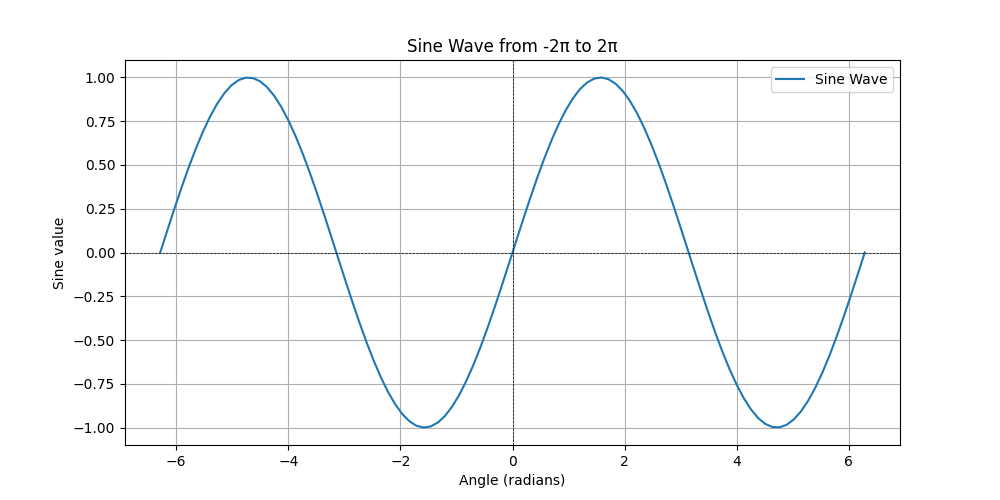

In [10]:
# We can also extrace the image, if there is one
image_responses = [x["content"] for x in response_json if x["variant"] == "Image"]
# it's base64, so we can use IPython to display it
from IPython.display import display, Image
from base64 import b64decode
for image in image_responses:
    display(Image(data=b64decode(image), format='png')) # only for testing. This will display the image in the notebook.

In [11]:
# Test the code_interpreter tool: This should return "Hello\nWorld\n!"
user_input = "Please use the code_interpreter tool to run the following code exactly and only once: \"print('Hello\\nWorld\\n!', flush=True)\"."
url = base_url + '/streamresponse?input=' + user_input + auth_string # leaving out the thread_id spawns a new thread
hello_world_response = requests.get(url, stream=True)

In [12]:
# retrieve thread_id
hello_world_response_reconstructed = []
for delta in hello_world_response:
    if delta.decode("utf-8")[0] == "{":
        hello_world_response_reconstructed.append(delta.decode("utf-8"))
    else:
        hello_world_response_reconstructed[-1] += delta.decode("utf-8")


In [13]:
import json
hello_world_response_json = [json.loads(x) for x in hello_world_response_reconstructed]
hw_thread_id = json.loads(hello_world_response_json[0]["content"])["thread_id"]
print(hw_thread_id)

# Also retrieve all variants seperately
hello_world_stream_output = [x["content"][0] for x in hello_world_response_json if x["variant"] == "CodeOutput"]
hello_world_stream_code = [x["content"][0] for x in hello_world_response_json if x["variant"] == "Code"]
hello_world_stream_assistant = [x["content"] for x in hello_world_response_json if x["variant"] == "Assistant"]
hello_world_stream_user = [x["content"] for x in hello_world_response_json if x["variant"] == "User"]

print("".join(hello_world_stream_output))
print("".join(hello_world_stream_code))
print("".join(hello_world_stream_assistant))
print("".join(hello_world_stream_user))


YGxzFu398tzg8gDcGKgBKzdxmp2hpUkt
Hello
World
!
{"code":"print('Hello\\nWorld\\n!', flush=True)"}
Hello  
World  
!



In [14]:
# Now also retrieve the response from the getThread endpoint
url = base_url + '/getthread?thread_id=' + hw_thread_id + auth_string
hello_world_thread_response = requests.get(url)
hello_world_thread_json = hello_world_thread_response.json()
hello_world_thread_text = hello_world_thread_response.text
hello_world_thread_code_output = [x["content"][0] for x in hello_world_thread_json if x["variant"] == "CodeOutput"]
hello_world_thread_code = [x["content"][0] for x in hello_world_thread_json if x["variant"] == "Code"]
hello_world_thread_assistant = [x["content"] for x in hello_world_thread_json if x["variant"] == "Assistant"]
hello_world_thread_user = [x["content"] for x in hello_world_thread_json if x["variant"] == "User"]


print("".join(hello_world_thread_code_output))
print("".join(hello_world_thread_code))
print("".join(hello_world_thread_assistant))
print("".join(hello_world_thread_user))


Hello
World
!
{"code":"print('Hello\\nWorld\\n!', flush=True)"}
Hello  
World  
!
Please use the code_interpreter tool to run the following code exactly and only once: "print('Hello\nWorld\n!', flush=True)".


In [15]:
print(hello_world_thread_text)

[{"variant":"ServerHint","content":"{\"thread_id\": \"YGxzFu398tzg8gDcGKgBKzdxmp2hpUkt\"}"},{"variant":"User","content":"Please use the code_interpreter tool to run the following code exactly and only once: \"print('Hello\\nWorld\\n!', flush=True)\"."},{"variant":"Code","content":["{\"code\":\"print('Hello\\\\nWorld\\\\n!', flush=True)\"}","call_bqRMZKi56p3wrUx01OAH222C"]},{"variant":"ServerHint","content":"{\"cpu_last_minute\":13.9599609375,\"cpu_usage\":25.676513671875,\"memory\":13429751808,\"process_cpu\":0.0,\"process_memory\":28803072,\"total_memory\":17179869184}"},{"variant":"CodeOutput","content":["Hello\nWorld\n!","call_bqRMZKi56p3wrUx01OAH222C"]},{"variant":"Assistant","content":"Hello  \nWorld  \n!"},{"variant":"StreamEnd","content":"Generation complete"}]


### Test the get_thread endpoint

In [16]:
# Generate a new thread asking it to add 2+2 in the code_interpreter
user_input = "Please add 2+2 in the code_interpreter tool."
url = base_url + '/streamresponse?input=' + user_input + auth_string # leaving out the thread_id spawns a new thread
response = requests.get(url, stream=True) # The response can be streamed or gotten all at once.

In [17]:
# To compare the output between streamresponse and getthread, output the json from getthread
recon_reponse = []
temp = response.text.split("}{")
for i in range(len(temp)):
    if i == 0:
        recon_reponse.append(temp[i] + "}")
    elif i == len(temp) - 1:
        recon_reponse.append("{" + temp[i])
    else:
        recon_reponse.append("{" + temp[i] + "}")
response_json = [json.loads(x) for x in recon_reponse]
response_json

[{'variant': 'ServerHint',
  'content': '{"thread_id": "83DMbKKLmxLXl0ytYlcqG8y5gxi9YluZ"}'},
 {'variant': 'Code', 'content': ['', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': ['{"', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': ['code', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': ['":"', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': ['result', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': [' =', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': [' ', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': ['2', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': [' +', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': [' ', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': ['2', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Code', 'content': ['\\n', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Co

In [18]:
# Extract the thread_id
thread_id = json.loads(response_json[0]["content"])["thread_id"]
print(thread_id)

83DMbKKLmxLXl0ytYlcqG8y5gxi9YluZ


In [19]:
# Use the thread_id to stream another response in the same thread
user_input = "Now please multiply that by 3."
url = base_url + '/streamresponse?input=' + user_input + '&thread_id=' + thread_id + auth_string
m3response = requests.get(url, stream=True)
m3complete_response = [] # The stream gets consumed when streamed, we'll store it here.

for delta in m3response:
    m3complete_response.append(delta.decode("utf-8"))

m3reconstructed_response = []
for i in range(len(m3complete_response)):
    if m3complete_response[i][0] == "{":
        m3reconstructed_response.append(m3complete_response[i])
    else:
        m3reconstructed_response[-1] += m3complete_response[i]

m3response_json = [json.loads(x) for x in m3reconstructed_response]


In [20]:
m3code = [x for x in m3response_json if x["variant"] == "Code"]
print("".join([x["content"][0] for x in m3code]).replace("\\\n","\n")) # This will print the generated code in order.
m3assistant_responses = [x for x in m3response_json if x["variant"] == "Assistant"]
print("".join([x["content"] for x in m3assistant_responses])) # This will print the Assistant's responses in order.

{"code":"result = 4 * 3\nresult"}
The result of multiplying by 3 is 12.


In [21]:
# Testing the get_thread endpoint
url = base_url + '/getthread?thread_id=' + thread_id + auth_string
getthreadresponse = requests.get(url)
getthreadresponse.text

'[{"variant":"ServerHint","content":"{\\"thread_id\\": \\"83DMbKKLmxLXl0ytYlcqG8y5gxi9YluZ\\"}"},{"variant":"User","content":"Please add 2+2 in the code_interpreter tool."},{"variant":"Code","content":["{\\"code\\":\\"result = 2 + 2\\\\nresult\\"}","call_ABnrBL2eGP1GIkfJhwF5PxCt"]},{"variant":"ServerHint","content":"{\\"cpu_last_minute\\":13.9599609375,\\"cpu_usage\\":25.67656707763672,\\"memory\\":13431422976,\\"process_cpu\\":0.0,\\"process_memory\\":33013760,\\"total_memory\\":17179869184}"},{"variant":"CodeOutput","content":["4","call_ABnrBL2eGP1GIkfJhwF5PxCt"]},{"variant":"Assistant","content":"The result of adding 2 + 2 is 4. If you have any other questions or requests, feel free to ask!"},{"variant":"StreamEnd","content":"Generation complete"},{"variant":"ServerHint","content":"{\\"thread_id\\": \\"83DMbKKLmxLXl0ytYlcqG8y5gxi9YluZ\\"}"},{"variant":"User","content":"Now please multiply that by 3."},{"variant":"Code","content":["{\\"code\\":\\"result = 4 * 3\\\\nresult\\"}","call_

In [22]:
# comparing the text of both responses. Both should be almost identical, but the getthread response should have collapsed many of the variants and is also a list, not a stream. 
print(response.text)
print(getthreadresponse.text)
getthreadresponse.json() 

{"variant":"ServerHint","content":"{\"thread_id\": \"83DMbKKLmxLXl0ytYlcqG8y5gxi9YluZ\"}"}{"variant":"Code","content":["","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":["{\"","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":["code","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":["\":\"","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":["result","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":[" =","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":[" ","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":["2","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":[" +","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":[" ","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":["2","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":["\\n","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":["result","call_ABnrBL2eGP1GIkfJhwF5PxCt"]}{"variant":"Code","content":["

[{'variant': 'ServerHint',
  'content': '{"thread_id": "83DMbKKLmxLXl0ytYlcqG8y5gxi9YluZ"}'},
 {'variant': 'User',
  'content': 'Please add 2+2 in the code_interpreter tool.'},
 {'variant': 'Code',
  'content': ['{"code":"result = 2 + 2\\nresult"}',
   'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'ServerHint',
  'content': '{"cpu_last_minute":13.9599609375,"cpu_usage":25.67656707763672,"memory":13431422976,"process_cpu":0.0,"process_memory":33013760,"total_memory":17179869184}'},
 {'variant': 'CodeOutput', 'content': ['4', 'call_ABnrBL2eGP1GIkfJhwF5PxCt']},
 {'variant': 'Assistant',
  'content': 'The result of adding 2 + 2 is 4. If you have any other questions or requests, feel free to ask!'},
 {'variant': 'StreamEnd', 'content': 'Generation complete'},
 {'variant': 'ServerHint',
  'content': '{"thread_id": "83DMbKKLmxLXl0ytYlcqG8y5gxi9YluZ"}'},
 {'variant': 'User', 'content': 'Now please multiply that by 3.'},
 {'variant': 'Code',
  'content': ['{"code":"result = 4 * 3\\nresult"}',

In [23]:
# In the Version 1.6.1, the backend storage went from text to JSON, this is a local test to see if the text is still supported.
text_thread_id = "Xlt8v1TBWSigKdEEe4Xlfmibad9n4fcp"
url = base_url + '/getthread?thread_id=' + text_thread_id + auth_string
text_thread_response = requests.get(url)
text_thread_response.json()

[{'variant': 'ServerHint',
  'content': '{"thread_id": "Xlt8v1TBWSigKdEEe4Xlfmibad9n4fcp"}'},
 {'variant': 'User',
  'content': 'This is a test. Use the code_interpreter function to calculate the product of 1286732 and 29843244 and return the result.'},
 {'variant': 'Code',
  'content': ['{"code":"result = 1286732 * 29843244\nresult"}',
   'call_6fpnltlksp0r9bgVFebQWRPK']},
 {'variant': 'CodeOutput',
  'content': ['38400257038608\n\n', 'call_6fpnltlksp0r9bgVFebQWRPK']},
 {'variant': 'Assistant',
  'content': 'The product of 1,286,732 and 29,843,244 is 38,400,257,038,608. If you have any further questions or tasks related to climate data analysis, feel free to ask!'},
 {'variant': 'StreamEnd', 'content': 'Generation complete'}]

In [24]:
# In the Version 1.6.3, the code_interpreter now has persistent storage, so we can test that here.
# We simply assign a variable in the code_interpreter and then retrieve it in a new thread.
user_input = "Please assign the value 42 to the variable x in the code_interpreter tool. After that, call the tool with the code \"print(x, flush=True)\", without assigning x again. It's a test for the presistance of data."
url = base_url + '/streamresponse?input=' + user_input + auth_string # leaving out the thread_id spawns a new thread
pers_response = requests.get(url, stream=True) # The response can be streamed or gotten all at once.
pers_reconstructed_response = []
for delta in pers_response:
    if delta.decode("utf-8")[0] == "{":
        pers_reconstructed_response.append(delta.decode("utf-8"))
    else:
        pers_reconstructed_response[-1] += delta.decode("utf-8")

pers_response_json = [json.loads(x) for x in pers_reconstructed_response]

In [25]:
print("".join([x["content"][0] for x in pers_response_json if x["variant"] == "Code"])) # Print the Code.
print("".join([x["content"][0] for x in pers_response_json if x["variant"] == "CodeOutput"])) # Print the CodeOutput.
print("".join([x["content"] for x in pers_response_json if x["variant"] == "Assistant"])) # This will print the Assistant's responses in order.
pers_thread_id = json.loads(pers_response_json[0]["content"])["thread_id"]
print(pers_thread_id)

{"code":"x = 42"}{"code":"print(x, flush=True)"}
42
The value 42 was successfully assigned to the variable `x`, and it was printed correctly, demonstrating that the data persists across calls in the code interpreter tool. If you have any further questions or tests, feel free to ask!
HIRIrjtEzmxVzL2KRJPq5h7dwviA85qJ


In [26]:
# In the Version 1.6.5, the capability to store xarray datasets between calls to the code_interpreter was added.
# This is a test to see if it works.
# We simply ask the LLM to generate a simple xarray dataset and then access it in a new code_interpreter call.
user_input = "Please generate a simple xarray dataset in the code_interpreter tool and print out the content. After that, call the tool with the code \"print(ds, flush=True)\", without generating the dataset again. It's a test for the presistance of data, specifically whether xarray Datasets also work."
url = base_url + '/streamresponse?input=' + user_input + auth_string # leaving out the thread_id spawns a new thread
xarray_response = requests.get(url, stream=True) # The response can be streamed or gotten all at once.
xarray_reconstructed_response = []
for delta in xarray_response:
    if delta.decode("utf-8")[0] == "{":
        xarray_reconstructed_response.append(delta.decode("utf-8"))
    else:
        xarray_reconstructed_response[-1] += delta.decode("utf-8")

xarray_response_json = [json.loads(x) for x in xarray_reconstructed_response]


In [27]:
# Print the results
print("".join([x["content"][0] for x in xarray_response_json if x["variant"] == "Code"])) # Print the Code.
print("".join([x["content"][0] for x in xarray_response_json if x["variant"] == "CodeOutput"])) # Print the CodeOutput.
print("".join([x["content"] for x in xarray_response_json if x["variant"] == "Assistant"])) # This will print the Assistant's responses in order.

{"code":"import xarray as xr\nimport numpy as np\n\n# Create a simple xarray dataset\nlon = np.linspace(0, 10, 5)\nlat = np.linspace(0, 10, 5)\ntime = pd.date_range('2023-01-01', periods=5)\n\n# Create a data array\ndata = np.random.rand(len(time), len(lat), len(lon))\n\n# Create the dataset\nds = xr.Dataset(\n    {\n        'temperature': (('time', 'lat', 'lon'), data)\n    },\n    coords={\n        'time': time,\n        'lat': lat,\n        'lon': lon\n    }\n)\n\n# Print the dataset content\nprint(ds)"}{"code":"print(ds, flush=True)"}
<xarray.Dataset> Size: 1kB
Dimensions:      (time: 5, lat: 5, lon: 5)
Coordinates:
  * time         (time) datetime64[ns] 40B 2023-01-01 2023-01-02 ... 2023-01-05
  * lat          (lat) float64 40B 0.0 2.5 5.0 7.5 10.0
  * lon          (lon) float64 40B 0.0 2.5 5.0 7.5 10.0
Data variables:
    temperature  (time, lat, lon) float64 1kB 0.08025 0.6963 ... 0.1375 0.253(An error occured; no traceback available)
SyntaxError: invalid syntax (<string>, line 

In [28]:
# In Version 1.7.1, the streamresponse endpoint was updated to allow for the setting of which chatbot to use. This tests whether it can be used.
# Stream a very simple request to llama instead of the default chatbot.
user_input = "This is a test request for your basic functionality. Please respond with (200 Ok) and exit."
url = base_url + '/streamresponse?input=' + user_input + "&chatbot=qwen2.5:3b" + auth_string # leaving out the thread_id spawns a new thread
llama_response = requests.get(url, stream=True) # The response can be streamed or gotten all at once.
llama_complete_response = [] # The stream gets consumed when streamed, we'll store it here.

for delta in llama_response:
    llama_complete_response.append(delta.decode("utf-8"))

llama_reconstructed_response = []
for i in range(len(llama_complete_response)):
    if llama_complete_response[i][0] == "{":
        llama_reconstructed_response.append(llama_complete_response[i])
    else:
        llama_reconstructed_response[-1] += llama_complete_response[i]

In [29]:
# Print out the response
llama_response_json = [json.loads(x) for x in llama_reconstructed_response]
print("".join([x["content"] for x in llama_response_json if x["variant"] == "Assistant"])) # This will print the Assistant's responses in order.

(200 OK)


In [30]:
# Stream a request to qwen2.5:3b to calculate 2938429834 * 234987234 using the code_interpreter tool.
user_input = "Please use the code_interpreter tool to run `print(2938429834 * 234987234)`. Make sure to adhere to the JSON format!"
url = base_url + '/streamresponse?input=' + user_input + "&chatbot=qwen2.5:3b" + auth_string # leaving out the thread_id spawns a new thread
qwen_response = requests.get(url, stream=True) # The response can be streamed or gotten all at once.
qwen_complete_response = [] # The stream gets consumed when streamed, we'll store it here.

for delta in qwen_response:
    qwen_complete_response.append(delta.decode("utf-8"))
    print(delta.decode("utf-8"))

qwen_reconstructed_response = []
for i in range(len(qwen_complete_response)):
    if qwen_complete_response[i][0] == "{":
        qwen_reconstructed_response.append(qwen_complete_response[i])
    else:
        qwen_reconstructed_response[-1] += qwen_complete_response[i]


{"variant":"ServerHint","content":"{\"thread_id\": \"u10YILDaknAep8e4H3fX3TZFSxsegLQe\"}"}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","content":["",""]}
{"variant":"Code","co

In [31]:

# Print out the response
qwen_response_json = [json.loads(x) for x in qwen_reconstructed_response]
print("".join([x["content"] for x in qwen_response_json if x["variant"] == "Assistant"])) # This will print the Assistant's responses in order.
# for element in qwen_response_json:
#     print(element)

The result of the calculation \( 2938429834 \times 654987234 \) is approximately \( 1.924634029274739156 \times 10^{17} \).

If you have any further questions or need additional analyses, feel free to ask!


In [32]:
# Test the heartbeat functionality introduced in 1.8.1 by sleeping for seven seconds in the code_interpreter tool.
user_input = "Please use the code_interpreter tool to run the following code: \"import time\ntime.sleep(7)\"."
url = base_url + '/streamresponse?input=' + user_input + auth_string # leaving out the thread_id spawns a new thread

response = requests.get(url, stream=True) # The response can be streamed or gotten all at once.
heartbeat_response = [] # The stream gets consumed when streamed, we'll store it here.

for delta in response:
    print(delta)
    heartbeat_response.append(delta.decode("utf-8"))

b'{"variant":"ServerHint","content":"{\\"thread_id\\": \\"lbEoABFSee2SxPYZNgkBJuathyHwIQMK\\"}"}'
b'{"variant":"Code","content":["","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":["{\\"","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":["code","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":["\\":\\"","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":["import","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":[" time","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":["\\\\","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":["ntime","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":[".sleep","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":["(","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":["7","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":[")","call_zpcYcKBWS8beUDm6w9Zb2bsB"]}'
b'{"variant":"Code","content":

In [33]:
# Reconstruct the response
reconstructed_response = []
for i in range(len(complete_response)):
    if complete_response[i][0] == "{":
        reconstructed_response.append(complete_response[i])
    else:
        reconstructed_response[-1] += complete_response[i]

# Extract the ServerHint variant
server_hint = [x for x in reconstructed_response if json.loads(x)["variant"] == "ServerHint"]
print(server_hint)

# The second element of the list contains the heartbeat message
print(json.loads(server_hint[1])["content"])

['{"variant":"ServerHint","content":"{\\"thread_id\\": \\"d9IdbpaJTbIYaFwcJ2VE5Gp1IlvLPHDa\\"}"}', '{"variant":"ServerHint","content":"{\\"cpu_last_minute\\":14.56591796875,\\"cpu_usage\\":25.676513671875,\\"memory\\":13429751808,\\"process_cpu\\":0.0,\\"process_memory\\":28803072,\\"total_memory\\":17179869184}"}']
{"cpu_last_minute":14.56591796875,"cpu_usage":25.676513671875,"memory":13429751808,"process_cpu":0.0,"process_memory":28803072,"total_memory":17179869184}
